In [129]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import binomtest,chisquare,ttest_1samp,chi2_contingency,ttest_ind,f_oneway,pearsonr

print(pd.__version__)
print(matplotlib.__version__)
print(sns.__version__)
print(scipy.__version__)

2.2.3
3.9.2
0.13.2
1.14.1


In [130]:
df = sns.load_dataset('healthexp')
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9



1. Spending_USD et Life_Expectancy semblent être corrélées.

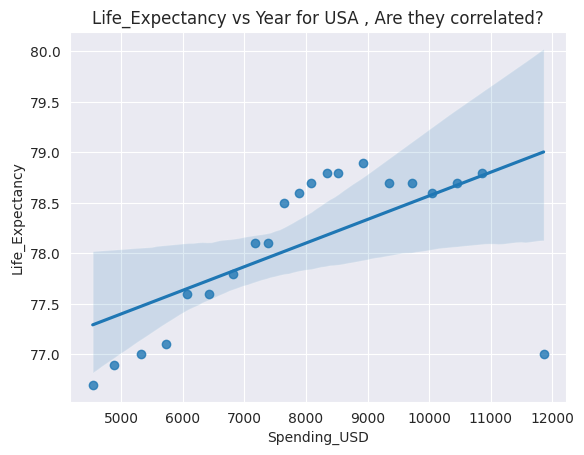

In [131]:
filtered_df = df.query("Country == 'USA' & 2000 <= Year <= 2020")
sns.regplot(data= filtered_df, x='Spending_USD',y = 'Life_Expectancy' )
plt.title("Life_Expectancy vs Year for USA , Are they correlated?")
plt.show()

- Quelle est la corrélation de Pearson entre ces deux variables aux États-Unis, de 2000 à 2020 ?

In [132]:
print("H0 : les dépenses et l'espérance de vie au USA entre 2000 et 2020 ne sont pas correlées \n")

alpha = 0.02
pvalue = pearsonr(x=filtered_df['Spending_USD'],y=filtered_df['Life_Expectancy']).pvalue

if pvalue < alpha:
    print("Nous avons assez d'évidences pour rejeter H0")
else:
    print("Nous n'avons pas assez d'évidences pour rejeter H0")

H0 : les dépenses et l'espérance de vie au USA entre 2000 et 2020 ne sont pas correlées 

Nous avons assez d'évidences pour rejeter H0


- Quelle serait la probabilité d'obtenir une corrélation au moins aussi importante que celle-ci, si en réalité les deux variables n'étaient pas corrélées ?

In [133]:
print(str(round(pvalue*100,2)) + "% de chance")

0.27% de chance


2. Dans les vidéos précédentes, il semblait également que l'Allemagne et la Grande-Bretagne avaient la même durée de vie moyenne de 1970 à 2020.

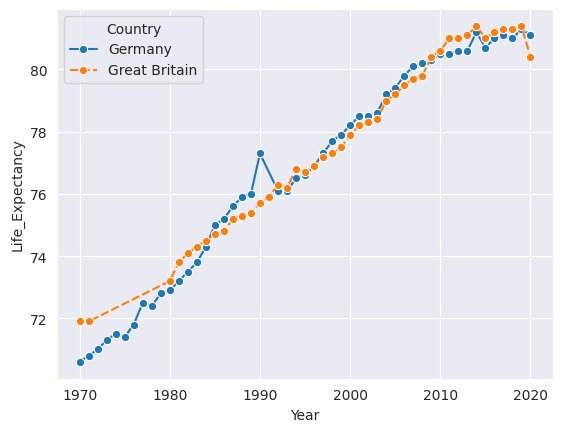

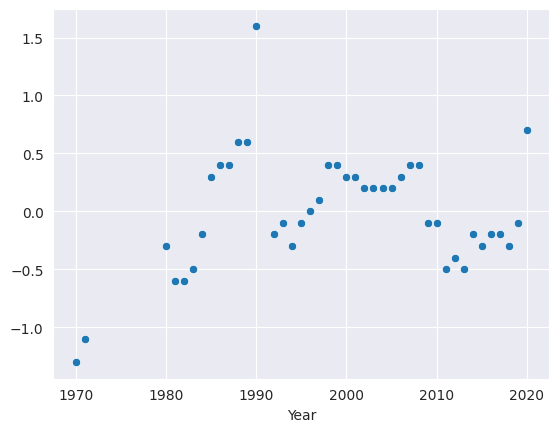

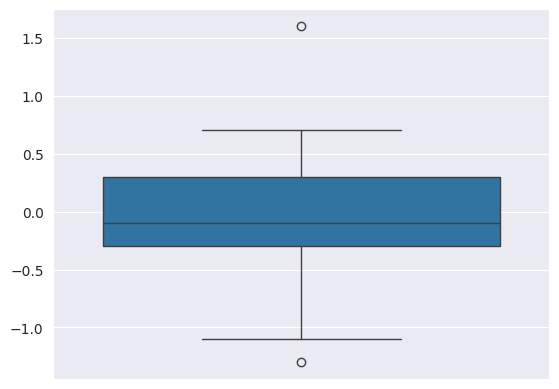

In [152]:
filtered_df = df.query("Country == 'Germany' | Country == 'Great Britain'")
sns.lineplot(data = filtered_df,x="Year",y="Life_Expectancy",hue="Country",style='Country',marker='o')
plt.show()

pivoted_filtered_df = filtered_df.pivot(index='Year',columns='Country',values='Life_Expectancy')
sns.scatterplot(pivoted_filtered_df['Germany']-pivoted_filtered_df['Great Britain'])
plt.show()
sns.boxplot(pivoted_filtered_df['Germany']-pivoted_filtered_df['Great Britain'])
plt.show()


- Quel test d'hypothèse utiliser ici ? Quelle condition doit-on respecter pour l'utiliser ?

In [147]:
print("il s'agit du test student d'independance qui assume que les 2 populations observés ont la même variance")
print(filtered_df.query("Country == 'Germany'")['Life_Expectancy'].var(),' ≃ ',
filtered_df.query("Country == 'Great Britain'")['Life_Expectancy'].var())

il s'agit du test student d'independance qui assume que les 2 populations observés ont la même variance
12.06808571428571  ≃  7.995027685492799



- Conduisez le test d'hypothèse. Concluez avec un niveau de confiance de 98 % (alpha = 0,02).

In [138]:
print("H0 : Il y a une correlation la durée de vie moyenne de l'Allemagne et de la Grande-Bretagne entre 1970 à 2020 \n")

alpha = 0.02
pvalue = ttest_ind(filtered_df.query("Country == 'Germany'")['Life_Expectancy'],filtered_df.query("Country == 'Great Britain'")['Life_Expectancy']).pvalue
if pvalue < alpha:
    print("Nous avons assez d'évidences pour rejeter H0")
else:
    print("Nous n'avons pas assez d'évidences pour rejeter H0")

H0 : Il y a une correlation la durée de vie moyenne de l'Allemagne et de la Grande-Bretagne entre 1970 à 2020 

Nous n'avons pas assez d'évidences pour rejeter H0




3. Un politicien américain affirme que depuis 1970, la durée de vie aux États-Unis augmente en moyenne de 0,3 an. Testez cette affirmation et donnez votre conclusion avec un niveau de confiance de 98 % (alpha = 0,02). (Vous pouvez utiliser la fonction `.diff()` de pandas pour calculer la différence d'une ligne à l'autre dans votre DataFrame).

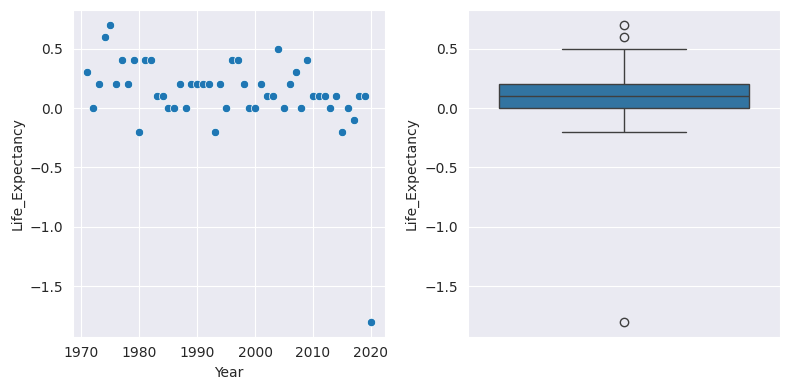

H0 : La durée de vie aux États-Unis augmente en moyenne de 0,3 an par an entre 1970 à 2020 

Nous avons assez d'évidences pour rejeter H0


In [151]:
filtered_df = df.query("Country == 'USA'")
fig,ax = plt.subplots(1,2)
sns.scatterplot(x=filtered_df['Year'], y=filtered_df['Life_Expectancy'].diff(),ax=ax[0])
sns.boxplot(filtered_df['Life_Expectancy'].diff().dropna(),ax=ax[1])
fig.set_size_inches(8,4)
fig.tight_layout()
plt.show()


print("H0 : La durée de vie aux États-Unis augmente en moyenne de 0,3 an par an entre 1970 à 2020 \n")

alpha = 0.02
pvalue = ttest_1samp(filtered_df['Life_Expectancy'].diff().dropna(),0.3).pvalue
if pvalue < alpha:
    print("Nous avons assez d'évidences pour rejeter H0")
else:
    print("Nous n'avons pas assez d'évidences pour rejeter H0")